<a href="https://colab.research.google.com/github/chetanrathod123/stock-price-prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

stock = yf.download("TCS.NS", start="2018-01-01", end="2024-01-01")
print(stock.head())


/tmp/ipython-input-1020365310.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("TCS.NS", start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2018-01-01  1103.473389  1123.994569  1099.052114  1118.780849  1351760
2018-01-02  1097.467285  1113.483896  1092.879211  1109.479718  1920290
2018-01-03  1100.573975  1113.232921  1097.466619  1097.800318  1257120
2018-01-04  1108.270020  1110.313757  1101.137610  1105.308586   913082
2018-01-05  1121.658813  1125.954939  1105.308608  1105.308608  1153706


In [2]:
import pandas as pd

stock = stock.reset_index()
stock.isnull().sum()


,,0
Price,Ticker,
Date,,0
Close,TCS.NS,0
High,TCS.NS,0
Low,TCS.NS,0
Open,TCS.NS,0
Volume,TCS.NS,0


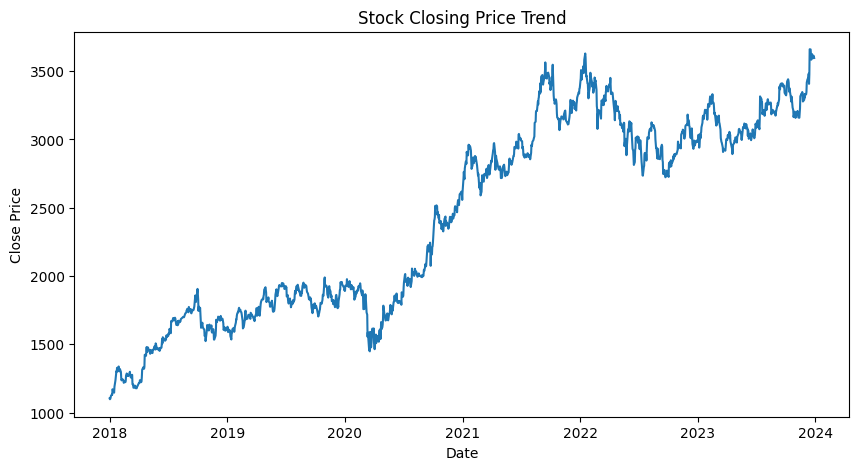

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(stock['Date'], stock['Close'])
plt.title("Stock Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [4]:
X = stock[['Open', 'High', 'Low', 'Volume']]
y = stock['Close']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
predictions = model.predict(X_test)


In [11]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predictions))

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)


print("MAE:", mae)
print("RMSE:", rmse)



MAE: 9.611703280181063
RMSE: 12.179656954447461


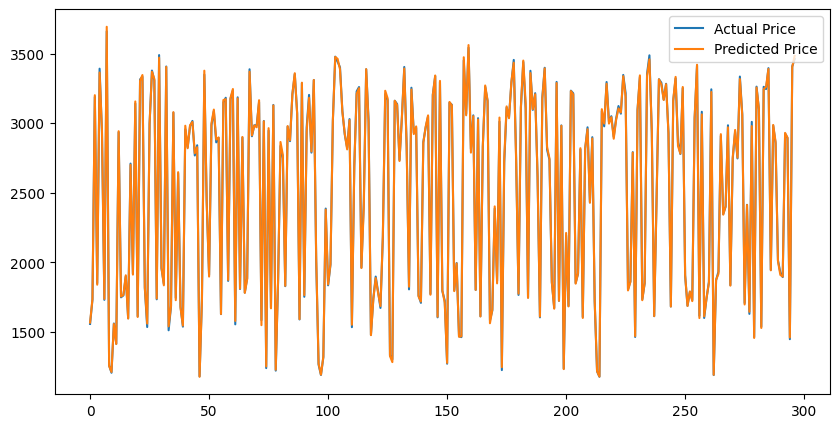

In [12]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.show()
